In [1]:
#import statements
import pandas as pd
import numpy as np
import string
import nltk
import math
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [2]:
#read in 3 csv files into dataframes
yelp = pd.read_csv('yelp_labelled.txt', sep="\t", header = None, names = ["Sentence","Sentiment"])
amazon = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header = None, names = ["Sentence","Sentiment"])
imdb = pd.read_csv('imdb_labelled.txt', sep="\t", header = None, names = ["Sentence","Sentiment"])

In [3]:
#yelp counts per value
yelp.Sentiment.value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [4]:
#amazon counts per value
amazon.Sentiment.value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [5]:
#imdb counts per value
imdb.Sentiment.value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [6]:
#make all values in the dataframes lowercase
yelp = yelp.apply(lambda x: x.astype(str).str.lower())
amazon = amazon.apply(lambda x: x.astype(str).str.lower())
imdb = imdb.apply(lambda x: x.astype(str).str.lower())

In [7]:
#function to strip away punctuation in our text
def strip_punctuation(string_to_strip):
    word_array = string_to_strip.split()
    ret_string = ""
    for word in word_array:
        new_word = word.translate(str.maketrans('', '', string.punctuation))
        ret_string += new_word
        ret_string +=" "
    return ret_string.rstrip() 

In [8]:
#function to remove stop words from our text
def remove_stops(string_to_remove_stops):
    tokenized = string_to_remove_stops.split()
    ret_string = ''
    stops_removed = [word for word in tokenized if word not in stop_words]
    
    for word in stops_removed:
        ret_string += word
        ret_string +=" "
    return ret_string.rstrip()

In [9]:
#function to conform all words to their respective stem words
def stem_strings(string_to_stem):
    word_array = string_to_stem.split()
    ret_string = ""
    for word in word_array:
        new_word = PorterStemmer().stem(word)
        ret_string += new_word
        ret_string +=" "
    return ret_string.rstrip() 

In [10]:
#download and assign english stop words
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bkadosh1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#stripping, stopping, stemming, and concatinating the reviews for yelp with their sentiment labels
yelp_stripped = yelp['Sentence'].apply(strip_punctuation,1)
yelp_stopped = yelp_stripped.apply(remove_stops,1)
yelp_stemmed = yelp_stopped.apply(stem_strings,1)
yelp_sentiment = yelp['Sentiment']
yelp_transformed = pd.concat([yelp_stemmed,yelp_sentiment], axis = 1)

In [12]:
#stripping, stopping, stemming, and concatinating the reviews for imdb with their sentiment labels
imdb_stripped = imdb['Sentence'].apply(strip_punctuation,1)
imdb_stopped = imdb_stripped.apply(remove_stops,1)
imdb_stemmed = imdb_stopped.apply(stem_strings,1)
imdb_sentiment = imdb['Sentiment']
imdb_transformed = pd.concat([imdb_stemmed,imdb_sentiment], axis = 1)

In [13]:
#stripping, stopping, stemming, and concatinating the reviews for amazon with their sentiment labels
amazon_stripped = amazon['Sentence'].apply(strip_punctuation,1)
amazon_stopped = amazon_stripped.apply(remove_stops,1)
amazon_stemmed = amazon_stopped.apply(stem_strings,1)
amazon_sentiment = amazon['Sentiment']
amazon_transformed = pd.concat([amazon_stemmed,amazon_sentiment], axis = 1)

In [14]:
#split amazon into train and test reviews and labels
amazon_train, amazon_test, amazon_label_train, amazon_label_test = train_test_split(amazon_transformed['Sentence'], 
                                                                                    amazon_transformed['Sentiment'], 
                                                                                    test_size=0.2, random_state=42)

In [15]:
#split yelp into train and test reviews and labels
yelp_train, yelp_test, yelp_label_train, yelp_label_test = train_test_split(yelp_transformed['Sentence'], 
                                                                            yelp_transformed['Sentiment'], 
                                                                            test_size=0.2, random_state=42)

In [16]:
#split imdb into train and test reviews and labels
imdb_train, imdb_test, imdb_label_train, imdb_label_test = train_test_split(imdb_transformed['Sentence'], 
                                                                            imdb_transformed['Sentiment'], 
                                                                            test_size=0.2, random_state=42)

In [17]:
#reset indices on splits to remove errors/confusion 
imdb_train = imdb_train.reset_index().iloc[:,1]
imdb_test = imdb_test.reset_index().iloc[:,1]
imdb_label_train = imdb_label_train.reset_index().iloc[:,1]
imdb_label_test = imdb_label_test.reset_index().iloc[:,1]

yelp_train = yelp_train.reset_index().iloc[:,1]
yelp_test = yelp_test.reset_index().iloc[:,1]
yelp_label_train = yelp_label_train.reset_index().iloc[:,1]
yelp_label_test = yelp_label_test.reset_index().iloc[:,1]

amazon_train = amazon_train.reset_index().iloc[:,1]
amazon_test = amazon_test.reset_index().iloc[:,1]
amazon_label_train = amazon_label_train.reset_index().iloc[:,1]
amazon_label_test = amazon_label_test.reset_index().iloc[:,1]

In [18]:
#combine all the training reviews from each dataframe, all the testing reviews from each dataframe
#combine all the training labels from each dataframe, all the testing labels from each dataframe
training_all = pd.concat([imdb_train, yelp_train, amazon_train], ignore_index=True)
testing_all = pd.concat([imdb_test, yelp_test, amazon_test], ignore_index=True)
training_labels_all = pd.concat([imdb_label_train, yelp_label_train, amazon_label_train], ignore_index=True)
testing_labels_all = pd.concat([imdb_label_test, yelp_label_test, amazon_label_test], ignore_index=True)

In [19]:
#create an empty vocabulary dictionary 
vocabulary = dict()

In [20]:
#fill the vocabulary dictionary so that each key has value 0 and so that each key is a unique word among all 
#training reviews
for i in range(len(training_all)):
    words = training_all[i].split()
    for word in words:
        vocabulary[word] = 0

In [21]:
#creates an easy to work with vector creater for our dictionary
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
vocab = vec.fit_transform(vocabulary).toarray()
word_names = vec.get_feature_names()

In [22]:
#array of zeroes length of vocabulary to start building set of features (empty one will be removed later)
reviews = np.zeros((1, len(vocabulary)))

#create a copy of the vocabulary as a feature and adjust counts of words for each review 
for i in range(len(training_all)):
    feature = vocabulary.copy()
    for word in training_all[i].split():
        feature[word] = feature[word] + 1
    review = vec.fit_transform(feature).toarray() 
    reviews = np.concatenate((reviews, review))

In [23]:
#create dataframe of feature vectors of reviews, drop first empty row, reset indices, and add column names 
#additionally, drop the last column as python did not recognize this special character 
review_text = pd.DataFrame(reviews)
review_text = review_text.drop([0])
review_text = review_text.reset_index()
review_text = review_text.drop('index', axis=1)
review_text.columns = word_names
review_text = review_text.drop(review_text.columns[-1], axis =1)

In [24]:
#array of zeroes length of vocabulary to start building set of features (empty one will be removed later)
reviews2 = np.zeros((1, len(vocabulary)))

#create a copy of the vocabulary as a feature and adjust counts of words for each review (for test set)
for i in range(len(testing_all)):
    feature = vocabulary.copy()
    for word in testing_all[i].split():
        if word in feature:
            feature[word] = feature[word] + 1
    review = vec.fit_transform(feature).toarray() 
    reviews2 = np.concatenate((reviews2, review))

In [25]:
#create dataframe of feature vectors of test reviews, drop first empty row, reset indices, and add column names 
#additionally, drop the last column as python did not recognize this special character 
review_text_test = pd.DataFrame(reviews2)
review_text_test = review_text_test.drop([0])
review_text_test = review_text_test.reset_index()
review_text_test = review_text_test.drop('index', axis=1)
review_text_test.columns = word_names
review_text_test = review_text_test.drop(review_text_test.columns[-1], axis =1)

In [26]:
#print two examples of feature vectors (extends into next cell as well)
training_review_list = review_text.values
print(training_review_list[0].tolist())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [27]:
print(training_review_list[14].tolist())

[52.0, 0.0, 46.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.

In [28]:
#creating a copy of our review training text and log normalizing it
review_text_copy = review_text.copy()

for i in range(review_text_copy.shape[0]):
    for j in range(review_text_copy.shape[1]):
        review_text_copy.at[i,review_text.columns[j]] = math.log10(review_text_copy.at[i,review_text.columns[j]]+1)

In [29]:
#creating a copy of our review testing text and log normalizing it
review_text_test_copy = review_text_test.copy()

for i in range(review_text_test_copy.shape[0]):
    for j in range(review_text_test_copy.shape[1]):
        review_text_test_copy.at[i,review_text_test.columns[j]] = math.log10(review_text_test_copy.at[i,review_text_test.columns[j]]+1)

In [30]:
#total number of positive (1) reviews and negative (0) reviews
total_positive = training_labels_all.astype(int).sum()
total_negative = len(training_labels_all) - total_positive

In [31]:
#add the labels to the log-normalized training set and then split it into a dataframe for positive (1) reviews and
#another dataframe for negative (0) reviews 
review_text_full = review_text_copy.copy()
review_text_full['labels'] = training_labels_all.astype(int)

review_text_0 = review_text_full[review_text_full['labels'] < 1]
review_text_1 =  review_text_full[review_text_full['labels'] > 0]

review_text_0 = review_text_0.reset_index()
review_text_0 = review_text_0.drop('index', axis=1)

review_text_1 = review_text_1.reset_index()
review_text_1 = review_text_1.drop('index', axis=1)

In [32]:
#since this is a long block of code, I have added comments in various places throughout this block

#convert positive and negative training dataframes and test dataframe into numpy arrays
review_text_train_np_0 = np.array(review_text_0)
review_text_train_np_1 = np.array(review_text_1)
review_text_test_np = np.array(review_text_test_copy)

#empty list for predicted labels for naive bayes classifier
test_predicted_labels = list()

#for each test review, initialize a list for the review feature vector, and two empty lists for probabilities for 
#relevant feature vectors for negative and positive reviews, respectively 
for i in range(len(review_text_test_np)):
    probs_0 = list()
    probs_1 = list()
    test = review_text_test_np[i].tolist()

    #for each test feature vector, take the values, count how many times that value appears in the train
    #set for positive reviews and in the train set for negative reviews, divide those values by number of positive 
    #and negative reviews, respectively, and append those final probabilities (per feature) to the 
    #respective probability array
    for i in range(len(test)):
        test_word = test[i]
        count = 0
        for row in review_text_train_np_0:
            if row[i] == test_word:
                count += 1
        prob0 = count/total_negative
        probs_0.append(prob0)

        count = 0
        for row in review_text_train_np_1:
            if row[i] == test_word:
                count += 1
        prob1 = count/total_positive
        probs_1.append(prob1)
    
    #multiply each of the probabilities for the relevant negative and positive reviews, respectively. 
    #then multiply the product of these independent probabilities by the probability of being a negative
    #review and of being a positive review, respectively
    naive_prob_0 = np.prod(probs_0)
    naive_prob_1 = np.prod(probs_1)     
    
    naive_prob_0 = naive_prob_0 * total_negative / (total_negative + total_positive)
    naive_prob_1 = naive_prob_1 * total_positive / (total_negative + total_positive)
    
    #if the probability for getting a negative label given the words is greater than the probability of 
    #getting a positive label given the words, then classify the review as a negative label
    #if it is the other way around, classify it as a positive value. If it is a tie, we arbitrarily classify it
    #as a 0
    if naive_prob_0 >= naive_prob_1:
        test_predicted_labels.append(0)
    else:
        test_predicted_labels.append(1) 

In [33]:
#test the accuracy with our predicted labels vs. actual labels
labels_actual = np.array(testing_labels_all.astype(int)).tolist()
accuracy_score(labels_actual, test_predicted_labels)

0.7363636363636363

In [34]:
#the code for this confusion matrix plotting function was found at the following link
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.
#html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#however, it was modified quite a lot for visual changes 
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None: cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=10)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", 
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('\nPredicted label'.format(accuracy, misclass))
    plt.show()

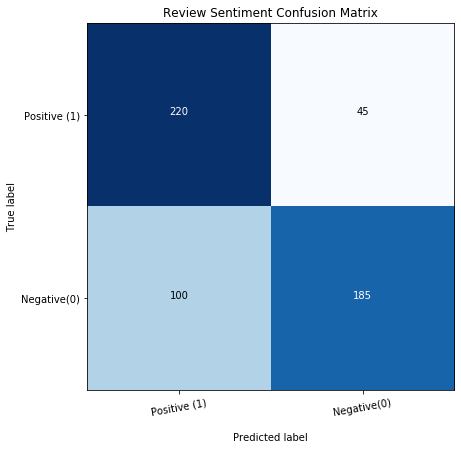

In [35]:
#create a confusion matrix for our actual test labels and predicted test labels 
#uses confusion matrix function defined above to create a visual representation of it 
plot_confusion_matrix(cm = confusion_matrix(labels_actual, test_predicted_labels), target_names = 
                      ["Positive (1)", "Negative(0)"], title = "Review Sentiment Confusion Matrix")

In [36]:
#create a logistic regression model with l2 penalty, and print out the mean accuracy score using cross validation
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', tol=0.001, C=5.0, solver='lbfgs', multi_class='multinomial')
scores = cross_validate(lr, review_text_copy, training_labels_all.astype(int), cv=10,scoring=('accuracy'),return_train_score=True)
scores['test_score'].mean()

0.7930231560005936

In [37]:
#fit the logistic regression model with our text and label training data 
lr.fit(review_text_copy, training_labels_all.astype(int))

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [38]:
#create a dictionary so that each coefficient value has a key that is the word/column it is associated with
#sort the dictionary in increasing order
coefs = dict()
for i in range(len(lr.coef_[0])):
    coefs[review_text_copy.columns[i]] = lr.coef_[0][i]
sorted_coefs = sorted(coefs.items(), key = lambda x: x[1])

In [39]:
#print the first 20 key-value pairs in the dictionary
#this represents the 20 words that have the strongest sentiment/indication of a negative review
sorted_coefs[0:20]

[('bad', -3.578999012751685),
 ('poor', -3.2642507308388757),
 ('worst', -3.004636783819291),
 ('wast', -2.8630096280696975),
 ('disappoint', -2.5988454220144597),
 ('fail', -2.4244840301602797),
 ('unfortun', -2.2949408990923836),
 ('noth', -2.2945628228616446),
 ('slow', -2.2938596756977785),
 ('averag', -2.2674942085793868),
 ('avoid', -2.214460585212774),
 ('aw', -2.2118007963345443),
 ('lack', -2.19169434114884),
 ('stupid', -2.1678299387620177),
 ('bland', -2.1618826842066534),
 ('horribl', -2.1529817270686853),
 ('didnt', -2.0905607179077688),
 ('rude', -2.045240566959359),
 ('terribl', -1.9292815962061691),
 ('start', -1.9147670948062994)]

In [40]:
#print the last 20 key-value pairs in the dictionary
#this represents the 20 words that have the strongest sentiment/indication of a positive review
last = len(sorted_coefs)
sorted_coefs[last - 20:last]

[('cool', 2.1985618053437737),
 ('interest', 2.262796841072671),
 ('wonder', 2.2789336617002123),
 ('sturdi', 2.293223918072851),
 ('well', 2.336399260852371),
 ('happi', 2.3915816647607846),
 ('enjoy', 2.417364409044665),
 ('good', 2.4377651933906197),
 ('perfect', 2.536737486522542),
 ('best', 2.579682704423841),
 ('comfort', 2.6421485683206134),
 ('fantast', 2.646046762845179),
 ('beauti', 2.6749125556514546),
 ('awesom', 2.8738587227057617),
 ('excel', 3.31130626433015),
 ('amaz', 3.4558254838350924),
 ('delici', 3.5183454268008028),
 ('nice', 3.53812564040485),
 ('love', 3.816390518341043),
 ('great', 5.240750665294592)]

In [41]:
#create a logistic regression model with l1 penalty, and print out the mean accuracy score using cross validation
lr2 = LogisticRegression(penalty='l1', tol=0.01, C = 45.0, solver='saga')
scores2 = cross_validate(lr2, review_text_copy, training_labels_all.astype(int), cv=10,scoring=('accuracy'),return_train_score=True)
scores2['test_score'].mean()

0.7734507568713854

In [42]:
#fit the logistic regression model with our text and label training data 
lr2.fit(review_text_copy, training_labels_all.astype(int))

LogisticRegression(C=45.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [43]:
#create a dictionary so that each coefficient value has a key that is the word/column it is associated with
#sort the dictionary in increasing order
coefs2 = dict()
for i in range(len(lr2.coef_[0])):
    coefs2[review_text_copy.columns[i]] = lr2.coef_[0][i]
sorted_coefs2 = sorted(coefs2.items(), key = lambda x: x[1])

In [44]:
#print the first 20 key-value pairs in the dictionary
#this represents the 20 words that have the strongest sentiment/indication of a negative review
sorted_coefs2[0:20]

[('bad', -4.4111940331587585),
 ('disappoint', -3.2753269639108873),
 ('wast', -2.8690037347973227),
 ('worst', -2.6156568177686097),
 ('poor', -2.5564632673959675),
 ('dont', -2.2652821102846654),
 ('didnt', -2.0427642458292476),
 ('noth', -1.7626464934145198),
 ('would', -1.7513092745140926),
 ('minut', -1.7495934046694424),
 ('money', -1.7113708536703807),
 ('terribl', -1.676169109387608),
 ('aw', -1.5919046570549757),
 ('could', -1.5508720566486691),
 ('wait', -1.5125441907501256),
 ('slow', -1.5096462502963208),
 ('old', -1.4490135065642737),
 ('stupid', -1.4105549779622513),
 ('wasnt', -1.4030533408595431),
 ('avoid', -1.3958969650762125)]

In [45]:
#print the last 10 key-value pairs in the dictionary
#this represents the 10 words that have the strongest sentiment/indication of a positive review
last2 = len(sorted_coefs)
sorted_coefs2[last - 20:last]

[('beauti', 1.4407255241477994),
 ('fantast', 1.470288847215514),
 ('friendli', 1.5373653043792137),
 ('enjoy', 1.6517487816001928),
 ('perfect', 1.7081421180303455),
 ('happi', 1.7887004150667392),
 ('film', 1.8639463457219532),
 ('awesom', 1.8855070870670565),
 ('price', 1.8953984388541094),
 ('wonder', 2.0058015194345007),
 ('comfort', 2.0521717817916056),
 ('amaz', 2.2685078920296196),
 ('delici', 2.5577167582349776),
 ('well', 2.5731049542554705),
 ('best', 3.130497294521048),
 ('excel', 3.1903570837336397),
 ('nice', 3.464797384325938),
 ('good', 3.8336812829158755),
 ('love', 4.4582370133357285),
 ('great', 7.369656738251705)]

In [46]:
#create an empty ngram vocabulary dictionary
vocabulary_ngram = dict()

In [47]:
#fill the ngram vocabulary dictionary so that each key has value 0 and so that each key is a unique bigram 
#among all training reviews
#for one word reviews, we create a bigram where the second word is just a blank string
for i in range(len(training_all)):
    words = training_all[i].split()
    if len(words) == 1:
        word = (words[0], "") 
        vocabulary_ngram[word] = 0
    else:   
        for j in range(len(words)-1):
            word = (words[j], words[j+1])
            vocabulary_ngram[word] = 0

In [48]:
#creates an easy to work with vector creater for our dictionary
vec2 = DictVectorizer()
vocab2 = vec2.fit_transform(vocabulary_ngram).toarray()
ngram_names = vec2.get_feature_names()

In [49]:
#array of zeroes length of vocabulary to start building set of features (empty one will be removed later)
reviews = np.zeros((1, len(vocabulary_ngram)))

#create a copy of the vocabulary as a feature and adjust counts of bigrams for each review 
#again, 1 word reviews are accounted for by adding a second empty string to the first word
for i in range(len(training_all)):
    words = training_all[i].split()
    feature = vocabulary_ngram.copy()
    if len(words) == 1:
        word = (words[0], "") 
        feature[word] = feature[word] + 1
    else:
        for j in range(len(words)-1):
            word = (words[j], words[j+1])
            feature[word] = feature[word] + 1
    review = vec2.fit_transform(feature).toarray() 
    reviews = np.concatenate((reviews, review))

In [50]:
#create dataframe of feature vectors of train reviews, drop first empty row, reset indices, and add column names 
#additionally, drop the last 4 columns as python did not recognize this special character 
review_text_ngram = pd.DataFrame(reviews)
review_text_ngram = review_text_ngram.drop([0])
review_text_ngram = review_text_ngram.reset_index()
review_text_ngram = review_text_ngram.drop('index', axis=1)
review_text_ngram.columns = ngram_names
review_text_ngram = review_text_ngram.drop(review_text_ngram.columns[-1], axis =1)
review_text_ngram = review_text_ngram.drop(review_text_ngram.columns[-1], axis =1)
review_text_ngram = review_text_ngram.drop(review_text_ngram.columns[-1], axis =1)
review_text_ngram = review_text_ngram.drop(review_text_ngram.columns[-1], axis =1)

In [51]:
#array of zeroes length of vocabulary to start building set of features (empty one will be removed later)
reviews2 = np.zeros((1, len(vocabulary_ngram)))

#create a copy of the vocabulary as a feature and adjust counts of bigrams for each test review 
#again, 1 word reviews are accounted for by adding a second empty string to the first word
for i in range(len(testing_all)):
    words = testing_all[i].split()
    feature = vocabulary_ngram.copy()
    if len(words) == 1:
        word = (words[0], "") 
        if word in feature:
            feature[word] = feature[word] + 1
    else:
        for j in range(len(words)-1):
            word = (words[j], words[j+1])
            if word in feature:
                feature[word] = feature[word] + 1
    review = vec2.fit_transform(feature).toarray() 
    reviews2 = np.concatenate((reviews2, review))

In [52]:
#create dataframe of feature vectors of test reviews, drop first empty row, reset indices, and add column names 
#additionally, drop the last 4 columns as python did not recognize this special character 
review_text_test_ngram = pd.DataFrame(reviews2)
review_text_test_ngram
review_text_test_ngram = review_text_test_ngram.drop([0])
review_text_test_ngram = review_text_test_ngram.reset_index()
review_text_test_ngram = review_text_test_ngram.drop('index', axis=1)
review_text_test_ngram.columns = ngram_names
review_text_test_ngram = review_text_test_ngram.drop(review_text_test_ngram.columns[-1], axis =1)
review_text_test_ngram = review_text_test_ngram.drop(review_text_test_ngram.columns[-1], axis =1)
review_text_test_ngram = review_text_test_ngram.drop(review_text_test_ngram.columns[-1], axis =1)
review_text_test_ngram = review_text_test_ngram.drop(review_text_test_ngram.columns[-1], axis =1)

In [53]:
#creating a copy of our ngram review training text and log normalizing it
review_ngram_text_copy = review_text_ngram.copy()

for i in range(review_ngram_text_copy.shape[0]):
    for j in range(review_ngram_text_copy.shape[1]):
        review_ngram_text_copy.at[i,review_text_ngram.columns[j]] = math.log10(review_ngram_text_copy.at[i,review_text_ngram.columns[j]]+1)            

In [54]:
#creating a copy of our ngram review testing text and log normalizing it
review_text_test_ngram_copy = review_text_test_ngram.copy()

for i in range(review_text_test_ngram_copy.shape[0]):
    for j in range(review_text_test_ngram_copy.shape[1]):
        review_text_test_ngram_copy.at[i,review_text_test_ngram.columns[j]] = math.log10(review_text_test_ngram_copy.at[i,review_text_test_ngram.columns[j]]+1)      

In [55]:
#add the labels to the log-normalized training set and then split it into a dataframe for positive (1) reviews and
#another dataframe for negative (0) reviews -- for ngram
review_text_ngram_full = review_ngram_text_copy.copy()
review_text_ngram_full['labels'] = training_labels_all.astype(int)

review_text_ngram_0 = review_text_ngram_full[review_text_ngram_full['labels'] < 1]
review_text_ngram_1 =  review_text_ngram_full[review_text_ngram_full['labels'] > 0]

review_text_ngram_0 = review_text_ngram_0.reset_index()
review_text_ngram_0 = review_text_ngram_0.drop('index', axis=1)

review_text_ngram_1 = review_text_ngram_1.reset_index()
review_text_ngram_1 = review_text_ngram_1.drop('index', axis=1)

In [56]:
#since this is a long block of code, I have added comments in various places throughout this block

#convert positive and negative training dataframes and test dataframe into numpy arrays -- for ngram
review_text_train_ngram_np_0 = np.array(review_text_ngram_0)
review_text_train_ngram_np_1 = np.array(review_text_ngram_1)
review_text_test_np_ngram = np.array(review_text_test_ngram_copy)

#empty list for ngram predicted labels for naive bayes classifier
test_predicted_labels = list()

#for each test review, initialize a list for the review feature vector, and two empty lists for probabilities for 
#relevant feature vectors for negative and positive reviews, respectively 
for i in range(len(review_text_test_np_ngram)):
    probs_0 = list()
    probs_1 = list()
    test = review_text_test_np_ngram[i].tolist()

    #for each test feature vector, take the values, count how many times that value appears in the train
    #set for positive reviews and in the train set for negative reviews, divide those values by number of positive 
    #and negative reviews, respectively, and append those final probabilities (per feature) to the 
    #respective probability array -- for ngram (values represent 2-words instead of a word)
    for i in range(len(test)):
        test_word = test[i]
        #very IMPORTANT. Here we are adding an if statement to allow our program to run faster (ignoring words
        #that are not present and only looking at words that are). Otherwise, the program would take to long to
        #actually be able to run (several hours). Additionally, in the bag of words example, we tried it both ways,
        #ignoring 0's and not ignoring 0's. The results/accuracy were essentially identical, so we ignore the 0's
        #here to drastically improve run-time with the assumption that accuracy will be similar
        #however, we want to make it clear that we understand the non-present words shouldn't just be ignored and 
        #that we would have done so had it been computationally feasible 
        if test_word > 0:
            count = 0
            for row in review_text_train_ngram_np_0:
                if row[i] == test_word:
                    count += 1
            prob0 = count/total_negative
            probs_0.append(prob0)

            count = 0
            for row in review_text_train_ngram_np_1:
                if row[i] == test_word:
                    count += 1
            prob1 = count/total_positive
            probs_1.append(prob1)
    
    #multiply each of the probabilities for the relevant for negative and positive reviews, respectively. 
    #then multiply the product of these independent probabilities by the probability of being a negative
    #review and of being a positive review, respectively 
    naive_prob_0 = np.prod(probs_0)
    naive_prob_1 = np.prod(probs_1)      
    
    naive_prob_0 = naive_prob_0 * total_negative / (total_negative + total_positive)
    naive_prob_1 = naive_prob_1 * total_positive / (total_negative + total_positive)
    
    #if the probability for getting a negative label given the words is greater than the probability of 
    #getting a positive label given the words, then classify the review as a negative label
    #if it is the other way around, classify it as a positive value. If it is a tie, we arbitrarily classify it
    #as a 0
    if naive_prob_0 >= naive_prob_1:
        test_predicted_labels.append(0)
    else:
        test_predicted_labels.append(1) 

In [57]:
#test the accuracy with our predicted labels vs. actual labels -- for ngram
labels_actual = np.array(testing_labels_all.astype(int)).tolist()
accuracy_score(labels_actual, test_predicted_labels)

0.6090909090909091

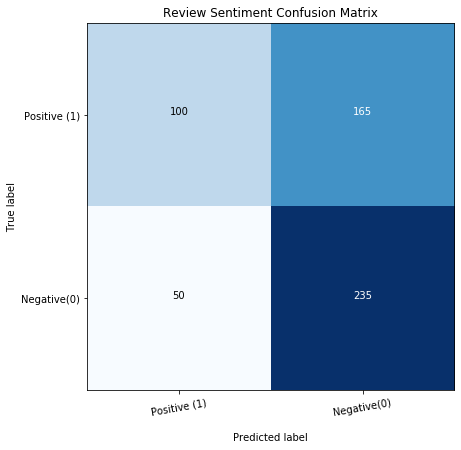

In [58]:
#create a confusion matrix for our actual test labels and predicted test labels for the ngram example
#uses confusion matrix function defined above to create a visual representation of it 
plot_confusion_matrix(cm = confusion_matrix(labels_actual, test_predicted_labels), target_names = 
                      ["Positive (1)", "Negative(0)"], title = "Review Sentiment Confusion Matrix")

In [59]:
#create a logistic regression model with l2 penalty, and print out the mean accuracy score using cross validation
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', tol=0.001, C=5.0, solver='lbfgs', multi_class='multinomial')
scores = cross_validate(lr, review_ngram_text_copy, training_labels_all.astype(int), cv=10,scoring=('accuracy'),return_train_score=True)
scores['test_score'].mean()

0.6456790899135783

In [60]:
#fit the logistic regression model with our text and label training data 
lr.fit(review_ngram_text_copy, training_labels_all.astype(int))

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [61]:
#create a dictionary so that each coefficient value has a key that is the word/column it is associated with
#sort the dictionary in increasing order
coefs = dict()
for i in range(len(lr.coef_[0])):
    coefs[review_ngram_text_copy.columns[i]] = lr.coef_[0][i]
sorted_coefs = sorted(coefs.items(), key = lambda x: x[1])

In [62]:
#print the first 20 key-value pairs in the dictionary
#this represents the 20 words that have the strongest sentiment/indication of a negative review
sorted_coefs[0:20]

[(('disappoint', ''), -2.4641914330939643),
 (('wast', 'money'), -2.3294649074775897),
 (('wast', 'time'), -1.863128666372419),
 (('dont', 'think'), -1.8182589371052584),
 (('wont', 'back'), -1.547983579848017),
 (('dont', 'wast'), -1.53017391272242),
 (('dont', 'buy'), -1.4301109433579375),
 (('poor', 'qualiti'), -1.369650653627439),
 (('avoid', 'cost'), -1.352350760329584),
 (('stay', 'away'), -1.340295353131793),
 (('doesnt', 'work'), -1.3296345422494205),
 (('piec', 'junk'), -1.295118064892778),
 (('wait', 'wait'), -1.211756276621208),
 (('food', 'averag'), -1.1410742113884869),
 (('good', 'way'), -1.130471358106623),
 (('ever', 'go'), -1.0839543436558283),
 (('qualiti', 'poor'), -1.0802390740661352),
 (('look', 'good'), -1.0665957859629625),
 (('worst', 'ever'), -1.0556680721742169),
 (('would', 'go'), -1.0393264808690716)]

In [63]:
#print the last 20 key-value pairs in the dictionary
#this represents the 20 words that have the strongest sentiment/indication of a positive review
last = len(sorted_coefs)
sorted_coefs[last - 20:last]

[(('well', 'made'), 1.291864970081487),
 (('great', 'deal'), 1.297803766512901),
 (('food', 'good'), 1.3228728076397303),
 (('pretti', 'good'), 1.3233367396488442),
 (('good', 'qualiti'), 1.3513813840814028),
 (('good', 'price'), 1.3586383406129035),
 (('work', 'fine'), 1.4276539377003943),
 (('food', 'delici'), 1.42926224877376),
 (('wont', 'disappoint'), 1.4583908938650416),
 (('one', 'best'), 1.480364642764635),
 (('great', 'servic'), 1.4864676018956866),
 (('5', 'star'), 1.505664855798875),
 (('work', 'well'), 1.5734620325698845),
 (('love', 'place'), 1.6146972313211616),
 (('easi', 'use'), 1.6633690133882837),
 (('realli', 'good'), 1.7898537560952201),
 (('great', 'product'), 1.826655061015979),
 (('highli', 'recommend'), 1.9559973595915314),
 (('great', 'phone'), 2.3929133323620735),
 (('work', 'great'), 2.719656931842833)]

In [64]:
#create a logistic regression model with l1 penalty, and print out the mean accuracy score using cross validation
lr2 = LogisticRegression(penalty='l1', tol=0.01, C = 45.0, solver='saga')
scores2 = cross_validate(lr2, review_ngram_text_copy, training_labels_all.astype(int), cv=10,scoring=('accuracy'),return_train_score=True)
scores2['test_score'].mean()

0.6479497979860591

In [65]:
#fit the logistic regression model with our text and label training data 
lr2.fit(review_ngram_text_copy, training_labels_all.astype(int))

LogisticRegression(C=45.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [66]:
#create a dictionary so that each coefficient value has a key that is the word/column it is associated with
#sort the dictionary in increasing order
coefs2 = dict()
for i in range(len(lr2.coef_[0])):
    coefs2[review_ngram_text_copy.columns[i]] = lr2.coef_[0][i]
sorted_coefs2 = sorted(coefs2.items(), key = lambda x: x[1])

In [67]:
#print the first 20 key-value pairs in the dictionary
#this represents the 20 words that have the strongest sentiment/indication of a negative review
sorted_coefs2[0:20]

[(('wast', 'money'), -2.414566331219471),
 (('disappoint', ''), -2.0396327952647697),
 (('dont', 'wast'), -1.9093117824602133),
 (('wast', 'time'), -1.8673128414004267),
 (('dont', 'think'), -1.7190480230208236),
 (('go', 'back'), -1.4611533353514763),
 (('wont', 'back'), -1.1432793767236513),
 (('dont', 'buy'), -0.9700134584521419),
 (('stay', 'away'), -0.9530118686638314),
 (('doesnt', 'work'), -0.9285317505034545),
 (('poor', 'qualiti'), -0.927050742578308),
 (('good', 'way'), -0.8618369143957058),
 (('ever', 'go'), -0.8571886197951033),
 (('wait', 'wait'), -0.8327533424596374),
 (('piec', 'junk'), -0.8325435646560674),
 (('year', 'old'), -0.7992331981872008),
 (('bad', 'food'), -0.7853681639090533),
 (('money', 'time'), -0.7839921570841901),
 (('never', 'ever'), -0.7824381824884726),
 (('zero', 'star'), -0.7752428538064574)]

In [68]:
#print the last 10 key-value pairs in the dictionary
#this represents the 10 words that have the strongest sentiment/indication of a positive review
last2 = len(sorted_coefs)
sorted_coefs2[last - 20:last]

[(('phone', 'work'), 0.9646177226203461),
 (('love', 'place'), 0.9822668108670249),
 (('great', 'food'), 1.041128443419636),
 (('well', 'made'), 1.0640682432686126),
 (('food', 'great'), 1.0685173212427654),
 (('good', 'qualiti'), 1.0885925520446),
 (('food', 'good'), 1.0907201466376006),
 (('work', 'fine'), 1.1078367140520395),
 (('food', 'delici'), 1.125243313385499),
 (('pretti', 'good'), 1.1276106568305904),
 (('easi', 'use'), 1.1856021996125632),
 (('5', 'star'), 1.2535509498346051),
 (('great', 'product'), 1.3988593589663416),
 (('one', 'best'), 1.418029479195674),
 (('great', 'servic'), 1.4324051400435456),
 (('work', 'well'), 1.4473092107629733),
 (('realli', 'good'), 1.4999664974075808),
 (('highli', 'recommend'), 1.7882889156164241),
 (('great', 'phone'), 1.9737156088612244),
 (('work', 'great'), 3.0814713123851654)]